In [122]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error    
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

In [79]:
df = pd.read_csv('bmw.csv')

In [80]:
#heading of dataset
df.head(5)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [81]:
#info of dateset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [82]:
#check discribe
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [83]:
df.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

In [155]:
#Getting list of columns == number
num_col = df.select_dtypes(include='number').columns
list_col = num_col.tolist()
list_col

['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']

In [160]:
#Function for p-value and KStest (Kolmogorov-Smirnov)
def KStest(columns):
    for col in columns:
        stat, p_value = stats.kstest(df[col], 'norm')
        print(f"Статистика теста для колонки {col}: {stat}")
        print(f"P-value для колонки {col}: {p_value}")
        
        if p_value <= 0.05:
            print('Можно отвергнуть нулевую гипотезу')
        else:
            print('Подтверждение нулевой гипотезы')
            
KStest(list_col)

Статистика теста для колонки Year: 1.0
P-value для колонки Year: 0.0
Можно отвергнуть нулевую гипотезу
Статистика теста для колонки Engine_Size_L: 0.9331927987311419
P-value для колонки Engine_Size_L: 0.0
Можно отвергнуть нулевую гипотезу
Статистика теста для колонки Mileage_KM: 0.99998
P-value для колонки Mileage_KM: 0.0
Можно отвергнуть нулевую гипотезу
Статистика теста для колонки Price_USD: 1.0
P-value для колонки Price_USD: 0.0
Можно отвергнуть нулевую гипотезу
Статистика теста для колонки Sales_Volume: 1.0
P-value для колонки Sales_Volume: 0.0
Можно отвергнуть нулевую гипотезу


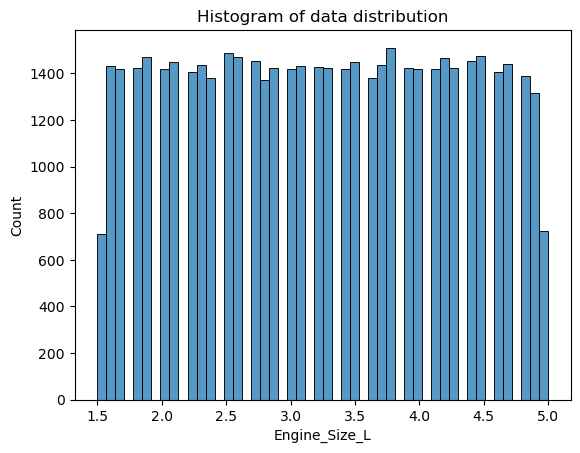

In [145]:
#Make histogram of data distribution
sns.histplot(data=df, x='Engine_Size_L', bins=50)
plt.title("Histogram of data distribution")
plt.show()

In [110]:
df_cat = df.select_dtypes(include='object')
df_cat_column = df_cat.columns.to_list()
colors = sns.color_palette('bright')

In [113]:
plt.pie(df_cat['Transmission'], labels=df_cat['Transmission'], colors=colors, autopct='%.0f%%')
plt.show()

ValueError: could not convert string to float: 'Manual'

In [54]:
data = df.copy()

In [72]:
#transform data from pipeline
simple_imputer = SimpleImputer(strategy='median')
ohe = OneHotEncoder()
std_scaler = StandardScaler()
xgb_reg = GradientBoostingRegressor()

In [71]:
pipe_numeric = Pipeline([('scaler', std_scaler), ('imputer', simple_imputer)])

In [ ]:
pipe_categorial = Pipeline()

KeyError: 'values'